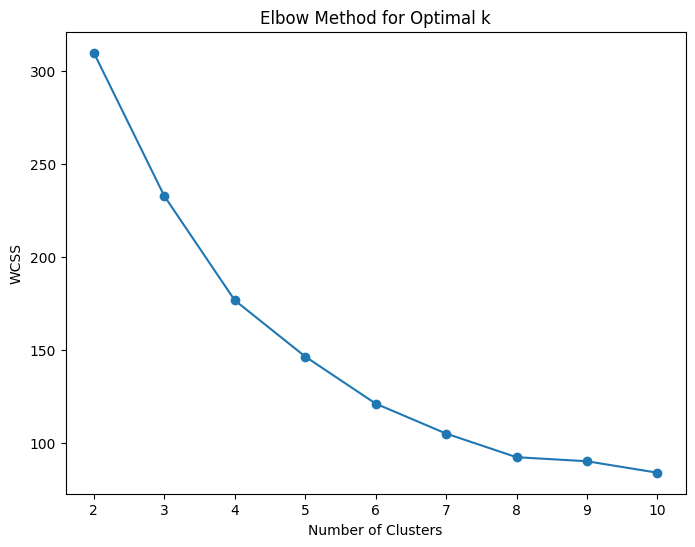

Davies-Bouldin Index: 0.8884718211478252
Silhouette Score: 0.37423953761013634


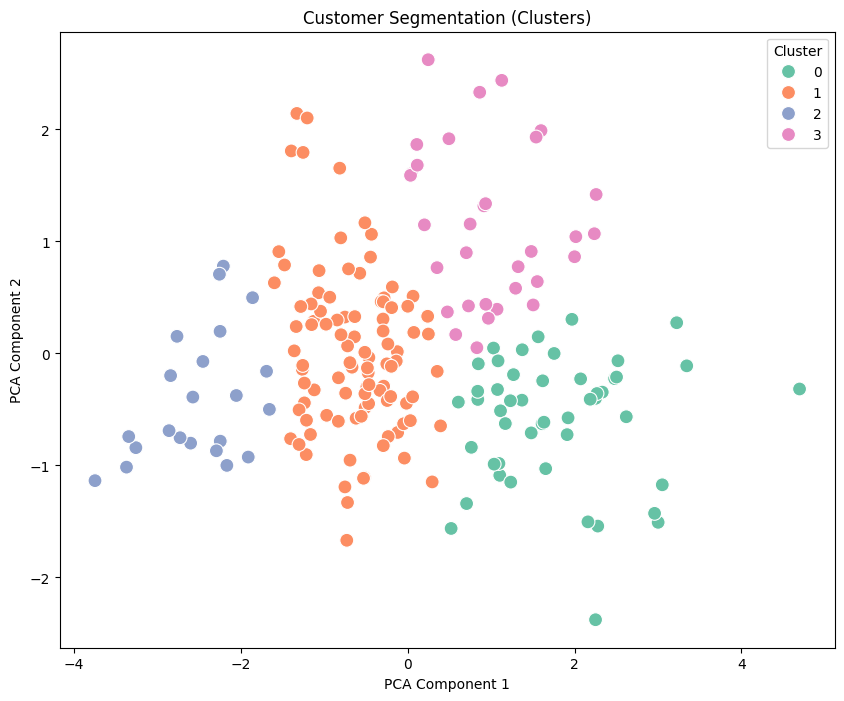

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

customer_summary = transactions.groupby('CustomerID').agg(
    TotalSpending=('TotalValue', 'sum'),
    TotalQuantity=('Quantity', 'sum'),
    AvgTransactionValue=('TotalValue', 'mean')
).reset_index()

data = customers.merge(customer_summary, on='CustomerID', how='left')

data = data.fillna(0)

features = data[['TotalSpending', 'TotalQuantity', 'AvgTransactionValue']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

db_index = davies_bouldin_score(features_scaled, data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

silhouette_avg = silhouette_score(features_scaled, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)
data['PCA1'] = features_2d[:, 0]
data['PCA2'] = features_2d[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set2', s=100)
plt.title('Customer Segmentation (Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

data[['CustomerID', 'Cluster']].to_csv('FirstName_LastName_Clustering.csv', index=False)
